Value of Loss 1 L1 is :  [0.24526146]
Value of Loss 1 L2 is :  [0.33025679]
Gradient 1 is :  [[-0.12457999  0.06774106 -0.06229     0.03387053 -0.1010608   0.13055096
  -0.01647849  0.02128702]]
Gradient 2 is :  [[-5.03998461e-06 -5.84951168e-09  1.51199538e-05  1.75485350e-08
   4.62200220e-06 -4.18066587e-07  2.76742952e-01 -2.50317885e-02]]

 Interpretation of curve 1 : We obtain our learning curve, that means that the evolution of the errors made by the model as it learns, we see that the errors decreases and that the cost function "LOSS" converges to a limit plateau value. 



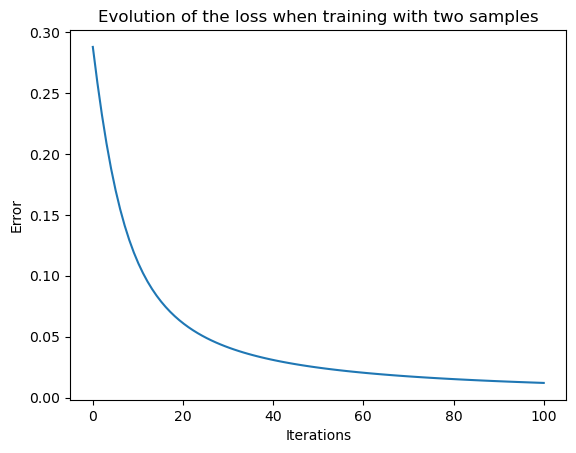

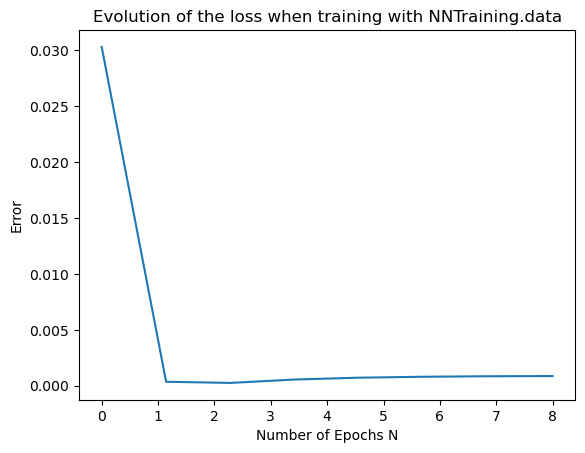

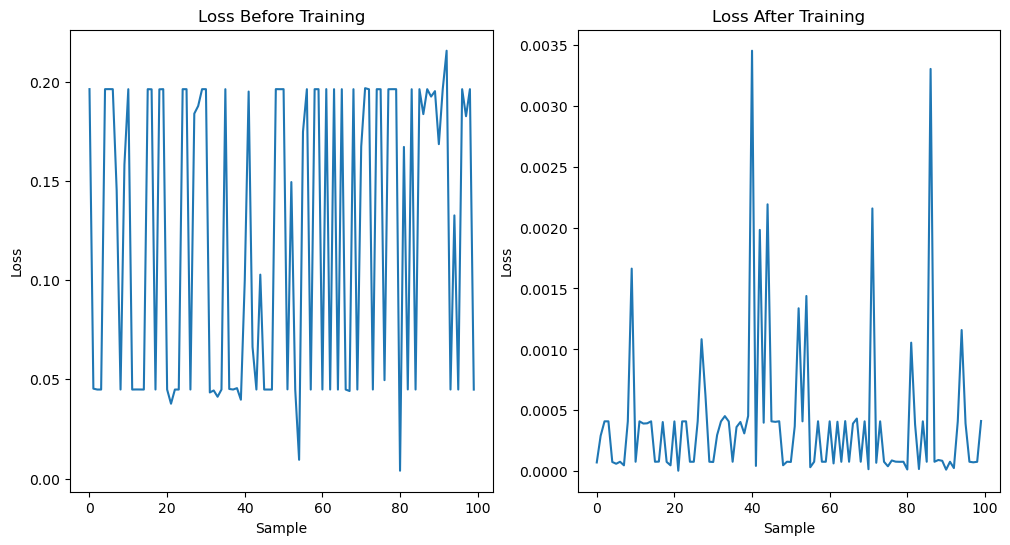

In [75]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(z):
    return 1/(1+np.exp(-z))

def forwardpass(x,t,w):
    x_1=x[0]
    x_2=x[1]
    
    t_1=t[0]
    t_2=t[1]
    
    w_0 = w[0] 
    w_1 = w[1] 
    w_2 = w[2] 
    w_3 = w[3] 
    w_4 = w[4] 
    w_5 = w[5]
    w_6 = w[6] 
    w_7 = w[7]
   
    #forwardpass
    h_1in = w_0* x_1 + w_2 * x_2
    h_2in = w_1* x_1 + w_3 * x_2
    
    h_1out = sigmoid(h_1in)
    h_2out = sigmoid(h_2in)
     
    y_1in = w_4* h_1out + w_6 * h_2out
    y_2in = w_5* h_1out + w_7 * h_2out
    
    y_1out = sigmoid(y_1in)
    y_2out = sigmoid(y_2in)
    
    
    #The Loss 
    L = (y_1out - t_1)**2 + (y_2out - t_2)**2
    
    #backpropagation
    delta_y1out = 2*(y_1out-t_1)
    delta_y2out = 2*(y_2out-t_2)
    
    delta_y1in = delta_y1out * sigmoid(y_1in)*(1-sigmoid(y_1in))
    delta_y2in = delta_y2out * sigmoid(y_2in)*(1-sigmoid(y_2in))
    
    delta_w4 = delta_y1in * h_1out
    delta_w5 = delta_y2in * h_1out 
    
    delta_w6 = delta_y1in * h_2out
    delta_w7 = delta_y2in * h_2out
    
    delta_h1out = delta_y1in * w_4 + delta_y2in * w_5
    delta_h2out = delta_y1in * w_6 + delta_y2in * w_7
    
    delta_h1in = delta_h1out * sigmoid(h_1in)*(1-sigmoid(h_1in))
    delta_h2in = delta_h2out * sigmoid(h_2in)*(1-sigmoid(h_2in))
    
    delta_w0 = delta_h1in * x_1
    delta_w1 = delta_h2in * x_1 
    
    delta_w2 = delta_h1in * x_2
    delta_w3 = delta_h2in * x_2
    grd = np.array([delta_w0,delta_w1,delta_w2,delta_w3,delta_w4,delta_w5,delta_w6,delta_w7])
    return L, grd.T

########################################
#2-Programming the Network
########################################

x1 = np.array([[2.],[1]])
t1 = np.array([[1.],[0]])

x2 = np.array([[-1.],[3]])
t2 = np.array([[0.],[1]])

w = np.array([2.,-3,-3,4,1,-1,0.25,2])

L1,grd1 = forwardpass(x1, t1, w)
L2,grd2 = forwardpass(x2, t2, w)

print('Value of Loss 1 L1 is : ', L1)
print('Value of Loss 1 L2 is : ', L2)

print('Gradient 1 is : ', grd1)
print('Gradient 2 is : ', grd2)

#############################################
#3.1-Training and Testing on three samples  
#############################################

i = 0
N = 100
wi = np.zeros((N+1,8))
L = np.zeros((N,1))
p = 1
tol = 10**-3
wi[0,:] = w
for i in range(0,N):
    L1,grd1 = forwardpass(x1, t1, wi[i,:])
    L2,grd2 = forwardpass(x2, t2, wi[i,:])
    grd = (grd1+grd2)/2
    wi[i+1,:] = wi[i,:] - p * grd
    L[i]=(L1+L2)/2
t=np.linspace(0,100,100)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Evolution of the loss when training with two samples')
plt.plot(t,L)  
print('\n Interpretation of curve 1 : We obtain our learning curve, that means that the evolution of the errors made by the model as it learns, we see that the errors decreases and that the cost function "LOSS" converges to a limit plateau value. \n')     

x3 = np.array([[1.],[4]])
t3 = np.array([[1.],[0]])
L3,grd3 = forwardpass(x3, t3, wi[N,:])

#############################################
#3.2-Training and Testing on a large Dataset
#############################################

data=pd.read_csv('NNTraining.data')
X_1 = data.iloc[:,0]
X_2 = data.iloc[:,1]
T_1 = data.iloc[:,2]
T_2 = data.iloc[:,3]

i = 0
N = 8
p = 6
tol = 10**-3
W = np.zeros((2,8))
W[0,:] = w
m=35
[l,c] = np.shape(data)
L = np.zeros((N,0))
Lm = np.zeros((N,1))
ggdr = np.zeros((l,8))
for i in range(0,N):
    
    for k in range (0,int(200/m)):
        sup = int((k+1)*200/m)
        infe = int(k*200/m)
        for j in range(infe,sup):
            L,ggdr[j] = forwardpass([X_1[j],X_2[j]], [T_1[j],T_2[j]], W[0,:])
        grd[0,0] = np.sum(ggdr[0:m,0])/m
        grd[0,1] = np.sum(ggdr[0:m,1])/m
        grd[0,2] = np.sum(ggdr[0:m,2])/m
        grd[0,3] = np.sum(ggdr[0:m,3])/m
        grd[0,4] = np.sum(ggdr[0:m,4])/m
        grd[0,5] = np.sum(ggdr[0:m,5])/m
        grd[0,6] = np.sum(ggdr[0:m,6])/m
        grd[0,7] = np.sum(ggdr[0:m,7])/m
       
        W[1,:] = W[0,:] - p * grd
        W[0,:] = W[1,:]
     
        Lm[i]= L
plt.figure()
t=np.linspace(0,N,N)
plt.plot(t,Lm)
plt.xlabel('Number of Epochs N')
plt.ylabel('Error')
plt.title('Evolution of the loss when training with NNTraining.data')
plt.show()

#############################################################
#3.3-Training and Testing on a large Dataset NNTrainingData
#############################################################

# Load test dataset
test_data = pd.read_csv('NNTest.data')

# Extract features and targets
x1_test = test_data.iloc[:, 0].values
x2_test = test_data.iloc[:, 1].values
t1_test = test_data.iloc[:, 2].values
t2_test = test_data.iloc[:, 3].values

# Combine features and targets
X_test = np.column_stack((x1_test, x2_test))
T_test = np.column_stack((t1_test, t2_test))

# Calculate loss before and after training
losses_before = []
losses_after = []

for x, t in zip(X_test, T_test):
    L_before, _, = forwardpass(x, t, np.array([2, -3, -3, 4, 1, -1, 0.25, 2]))  # Initial weights
    L_after, _, = forwardpass(x, t, W[0,:])  # Trained weights
    losses_before.append(L_before)
    losses_after.append(L_after)

# Plot losses before and after training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(losses_before)
plt.title('Loss Before Training')
plt.xlabel('Sample')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(losses_after)
plt.title('Loss After Training')
plt.xlabel('Sample')
plt.ylabel('Loss')

plt.show()

